<a href="https://colab.research.google.com/github/rsarin20/COVID-19/blob/master/Exploration_of_COVID19_data_(May_Edition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration of COVID19 using Plotly and Seaborn**

Origin: https://ourworldindata.org/coronavirus (first exploration - 20th April)

Data: https://github.com/owid/covid-19-data/tree/master/public/data, https://github.com/owid

Plotly Guide: https://plotly.com/python/plotly-express/

Seaborn Guide: https://seaborn.pydata.org/examples/index.html

# **Basic data checks**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
covid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [0]:
covid.dtypes

iso_code                     object
location                     object
date                         object
total_cases                   int64
new_cases                     int64
total_deaths                  int64
new_deaths                    int64
total_cases_per_million     float64
new_cases_per_million       float64
total_deaths_per_million    float64
new_deaths_per_million      float64
total_tests                 float64
new_tests                   float64
total_tests_per_thousand    float64
new_tests_per_thousand      float64
tests_units                  object
population                  float64
population_density          float64
median_age                  float64
aged_65_older               float64
aged_70_older               float64
gdp_per_capita              float64
extreme_poverty             float64
cvd_death_rate              float64
diabetes_prevalence         float64
female_smokers              float64
male_smokers                float64
handwashing_facilities      

In [0]:
print(covid.location.unique())
print(covid.columns)

['Aruba' 'Afghanistan' 'Angola' 'Anguilla' 'Albania' 'Andorra'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Bonaire Sint Eustatius and Saba' 'Burkina Faso' 'Bangladesh' 'Bulgaria'
 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Chile' 'China'
 "Cote d'Ivoire" 'Cameroon' 'Democratic Republic of Congo' 'Congo'
 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Western Sahara' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'Falkland Islands' 'France' 'Faeroe Islands' 'Gabon' 'United Kingdom'
 'Georgia' 'Guernsey' 'Ghana' 'Gibraltar' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 

In [0]:
covid_top = covid[covid.location.isin(['India','Spain','Italy','Germany','Switzerland','United Kingdom','South Korea','Singapore','United States','Mexico','Brazil','Russia','Ireland','France','Sweden','Norway','Greece','Canada','China','Turkey','Japan'])]

# **Plotly Charts and Fun**

In [0]:
pip install plotly

In [0]:
import plotly.express as px

fig = px.scatter(covid_top,
              x = covid_top.location, 
              y = (covid_top.total_deaths/covid_top.total_cases), 
              color = covid_top.location,
              template = 'plotly_dark',
              size_max = 5, 
              # render_mode = 'webgl'
              )
fig.show()

fig.write_html("/content/drive/My Drive/Colab Notebooks/COVID/case_fatality_covid.html")

In [0]:
fig = px.bar_polar(covid_top[covid_top.date > '2020-02-25'],
                   r="total_cases_per_million", theta="location", color="location", template="plotly_dark"
                  #  animation_frame = 'date'
                   )
                  #  color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

fig.write_html("/content/drive/My Drive/Colab Notebooks/COVID/cases_per_million_covid_spider.html")

In [0]:
fig = px.bar(covid_top[covid_top.date > '2020-02-25'],
             x = 'date', y= 'new_deaths',
             color = 'location',
             template='seaborn')

fig.show()

fig.write_html("/content/drive/My Drive/Colab Notebooks/COVID/new_cases_perday_covid.html")

In [0]:
fig = px.bar(covid_top[covid_top.date > '2020-02-25'],
             x = 'date', y= 'new_cases',
             color = 'location',
             template='seaborn')

fig.show()

In [0]:
fig = px.bar(covid_top[covid_top.date > '2020-02-25'],
             x = 'date', y= 'total_cases',
             color = 'location',
             template='plotly_dark')

fig.show()
fig.write_html("/content/drive/My Drive/Colab Notebooks/COVID/total_cases_perday_covid.html")

In [0]:
import plotly.express as px

fig = px.line(covid_top[covid_top.date > '2020-02-28'],
              x = 'date', 
              y = 'total_tests_per_thousand', 
              color = 'location',
              template = 'plotly_dark', 
              facet_col='location'
              )
fig.show()

In [0]:
import plotly.express as px

fig = px.line(covid_top[covid_top.date > '2020-02-28'],
              x = 'date', 
              y = 'total_cases_per_million', 
              color = 'location',
              template = 'plotly_dark'
              )
fig.show()

In [0]:
import plotly.express as px

fig = px.scatter(covid_top,
              x = covid_top.total_deaths_per_million, 
              y = covid_top.total_tests_per_thousand, 
              color = covid_top.location,
              template = 'plotly_dark',
              size_max = 5, render_mode = 'webgl')
fig.show()
fig.write_html("/content/drive/My Drive/Colab Notebooks/COVID/cases_tests_density_scatter_covid.html")

In [0]:
import plotly.express as px

fig = px.scatter(covid_top,
              x = covid_top.total_cases_per_million, 
              y = covid_top.total_deaths_per_million, 
              color = covid_top.location,
              template = 'plotly_dark',
              size_max = 5, render_mode = 'webgl')
fig.show()
fig.write_html("/content/drive/My Drive/Colab Notebooks/COVID/cases_deaths_density_scatter_covid.html")

In [0]:
# COVID-19 spread across Europe

import plotly.express as px

fig = px.choropleth(covid, 
                    locations="location", locationmode='country names', 
                    color="total_cases",
                    hover_name="location", 
                    # animation_frame="date", 
                    range_color=[0,230000],
                    width=1000, height=1000,
                    projection='eckert4',
                    # template='plotly-dark',
                    color_continuous_scale=px.colors.sequential.Agsunset,
                    scope='europe',
                    # 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 
                    # 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', or 'sinusoidal'
                    title="/t How COVID-19 spead across the World"
                    )
fig.show()


# **Seaborn Charts**

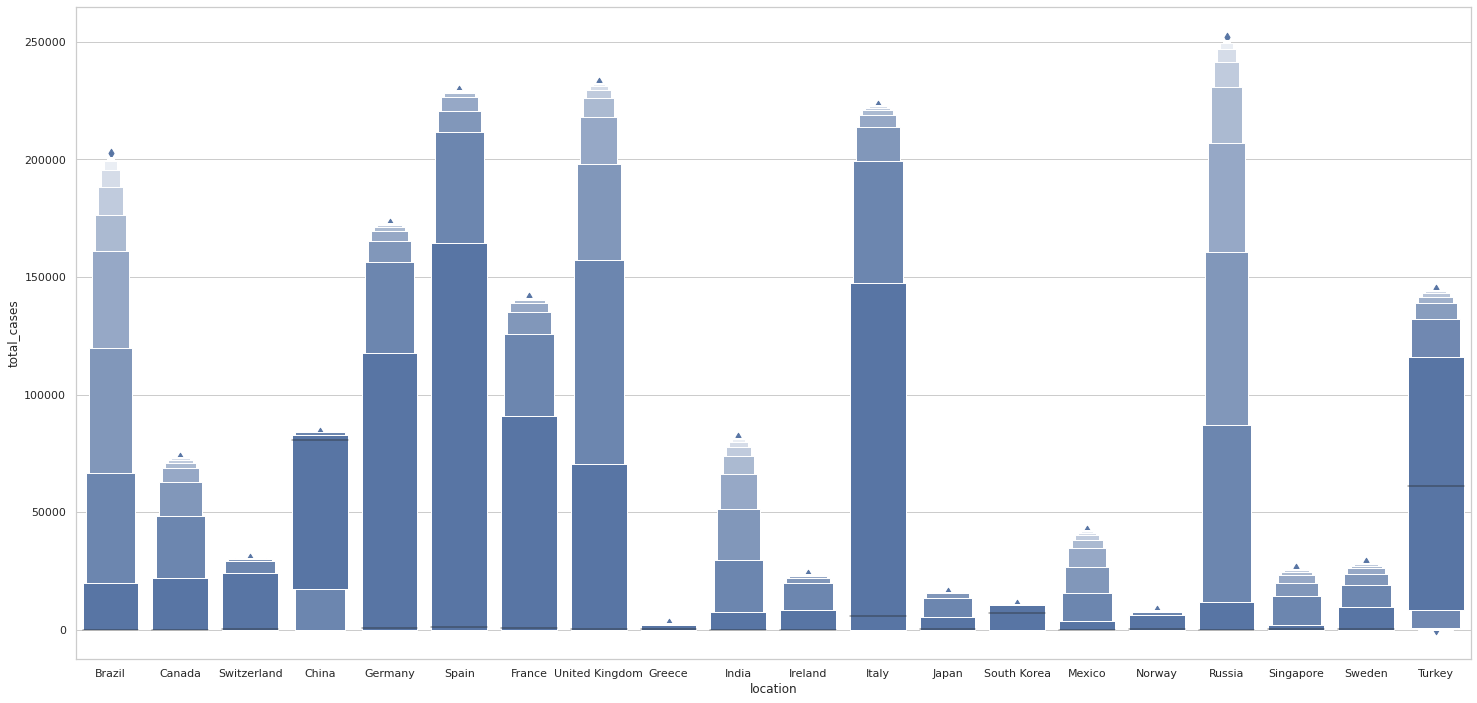

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

a = (25, 12)
fig, ax = plt.subplots(figsize=a)

sns.boxenplot(x="location", y="total_cases",
              color="b",
              scale="linear", data=covid_top[covid_top.location != 'United States'],
              ax=ax
              )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



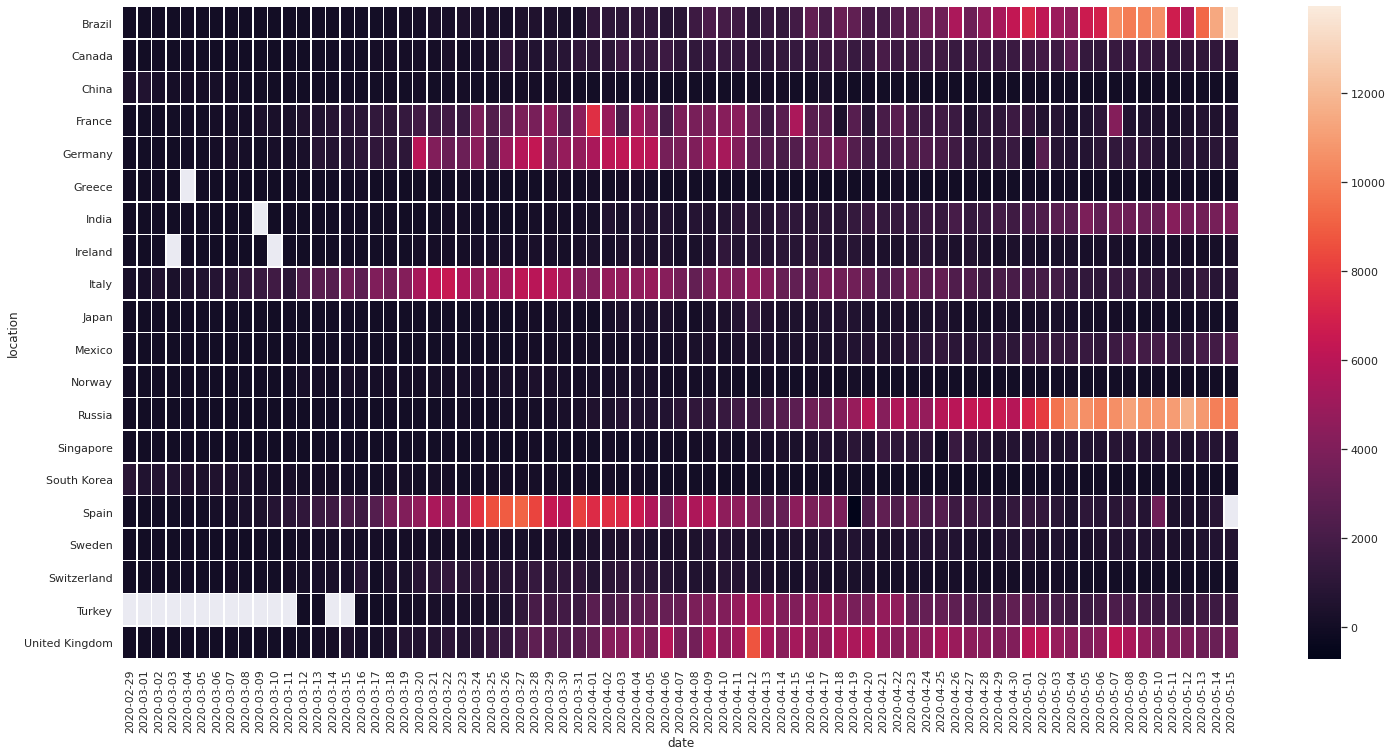

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# covid_sns = sns.load_dataset(covid_top[covid_top.date > '2020-02-28'])
covid_sns = covid_top[covid_top.date > '2020-02-28'][covid_top.location != 'United States'].pivot("location", "date", "new_cases")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(covid_sns, 
            # annot=True, 
            # fmt="d", 
            linewidths=.5, ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



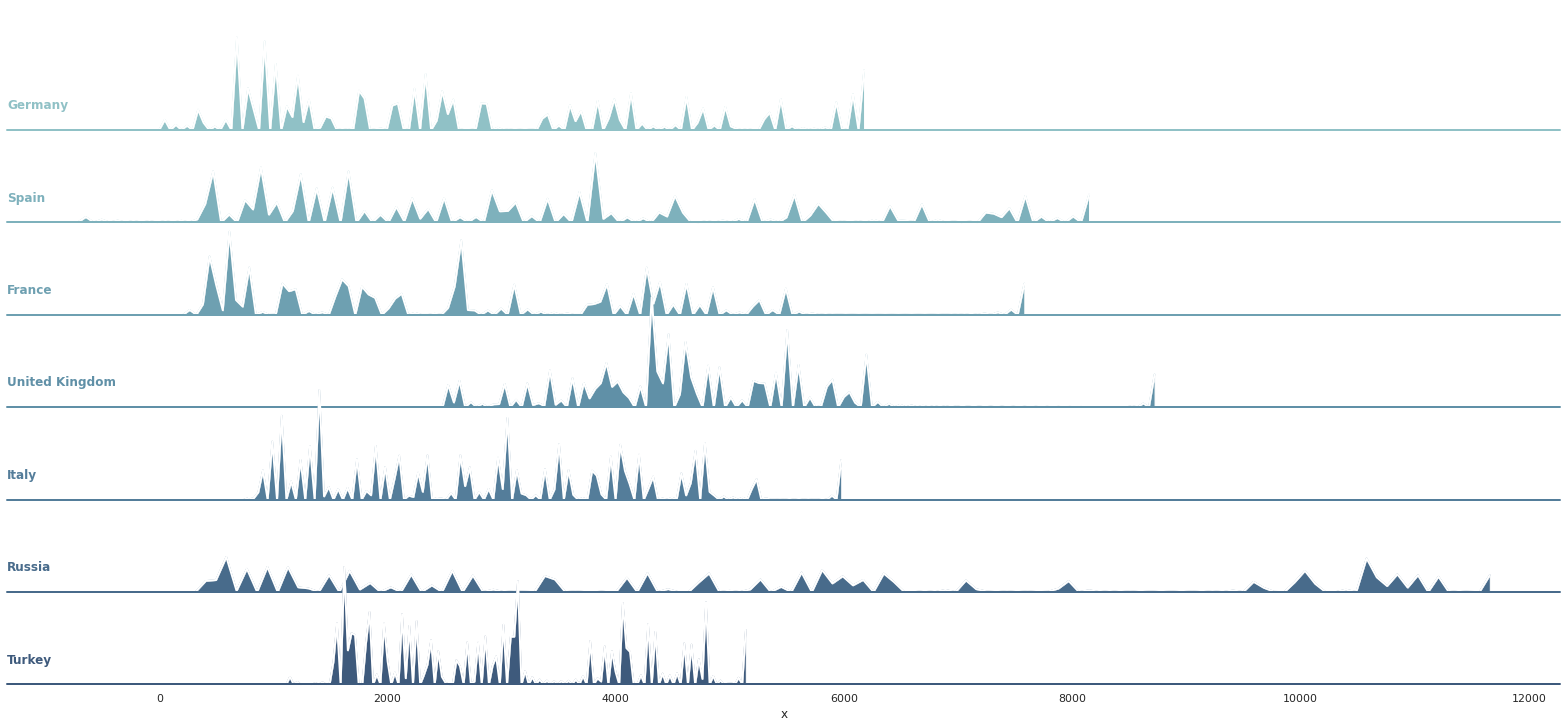

In [0]:
# Create the data
# rs = np.random.RandomState(1979)
x = covid_top[covid_top.date > '2020-03-28'][covid_top.location.isin(['Spain','Italy','Germany','United Kingdom','Russia','France','Turkey'])].new_cases
g = covid_top[covid_top.date > '2020-03-28'][covid_top.location.isin(['Spain','Italy','Germany','United Kingdom','Russia','France','Turkey'])].location
df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)